In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Display settings
sns.set(style='whitegrid')

In [2]:
df = pd.read_csv('gld_price_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
# Features and target
X = df[['SPX', 'USO', 'SLV', 'EUR/USD']]
y = df['GLD']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Checking which variable does Gold price align / correlate with the most out of the given variables

In [4]:
df = df.drop('Date',axis = 1)
correlation = df.corr()
correlation["GLD"]

,GLD
SPX,0.049345
GLD,1.000000
USO,-0.186360
SLV,0.866632
EUR/USD,-0.024375


# Linear Regression

In [6]:
# Initialize and train
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 56.17
R² Score: 0.8976


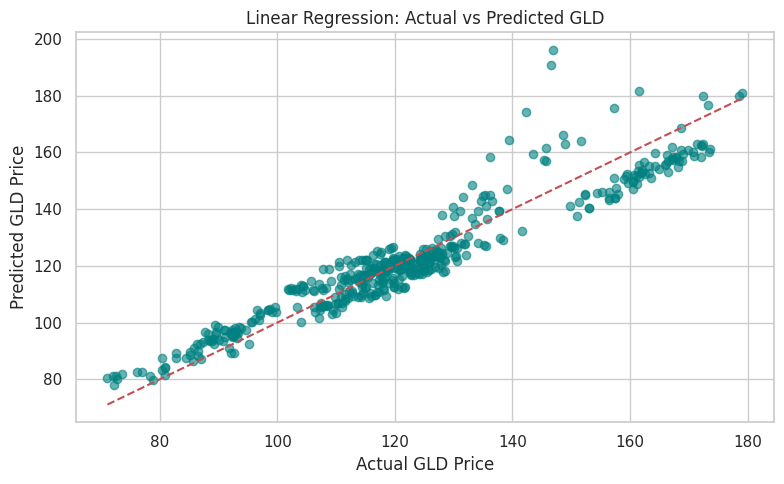

In [7]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual GLD Price")
plt.ylabel("Predicted GLD Price")
plt.title("Linear Regression: Actual vs Predicted GLD")
plt.tight_layout()
plt.show()

# Neural Networks

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Defining neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 15501.1279 - mae: 122.3265 - val_loss: 15072.9189 - val_mae: 120.6381
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14430.4111 - mae: 117.7129 - val_loss: 11355.6416 - val_mae: 104.2543
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9487.0898 - mae: 94.2374 - val_loss: 3980.7363 - val_mae: 59.5561
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2712.8030 - mae: 47.3626 - val_loss: 604.5040 - val_mae: 19.2357
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 685.0628 - mae: 19.6668 - val_loss: 459.6858 - val_mae: 15.8834
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 541.3071 - mae: 17.1007 - val_loss: 413.7820 - val_mae: 14.9614
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 513.4125 - mae: 16.3986 - val_loss: 371.9525 - val_mae: 14.0355
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 464.0577 - mae: 15.3859 - val_loss: 332.0778 - val_mae: 13.1489
E

In [12]:
# Predict on test data
y_pred_nn = model.predict(X_test_scaled).flatten()

# Evaluation metrics
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network MSE: {mse_nn:.2f}")
print(f"Neural Network R² Score: {r2_nn:.4f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Neural Network MSE: 39.85
Neural Network R² Score: 0.9273


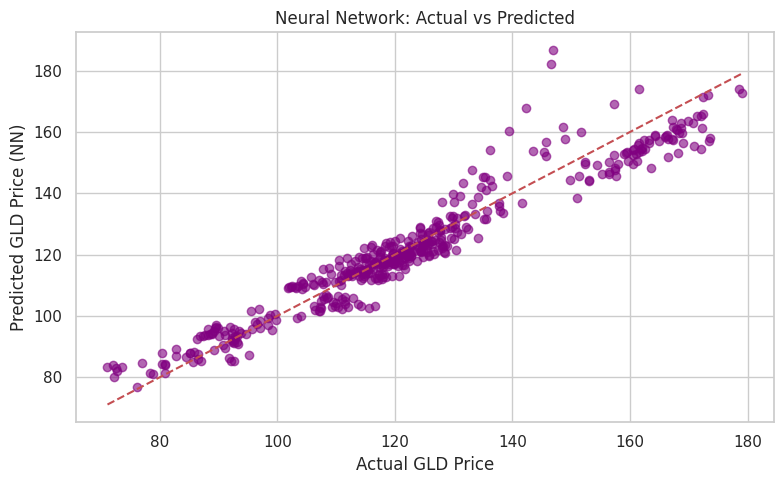

In [13]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_nn, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual GLD Price")
plt.ylabel("Predicted GLD Price (NN)")
plt.title("Neural Network: Actual vs Predicted")
plt.tight_layout()
plt.show()

# XGBoost

In [14]:
import xgboost as xgb
from xgboost import XGBRegressor

# Initialize the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [15]:
# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MSE: {mse_xgb:.2f}")
print(f"XGBoost R² Score: {r2_xgb:.4f}")

XGBoost MSE: 8.34
XGBoost R² Score: 0.9848


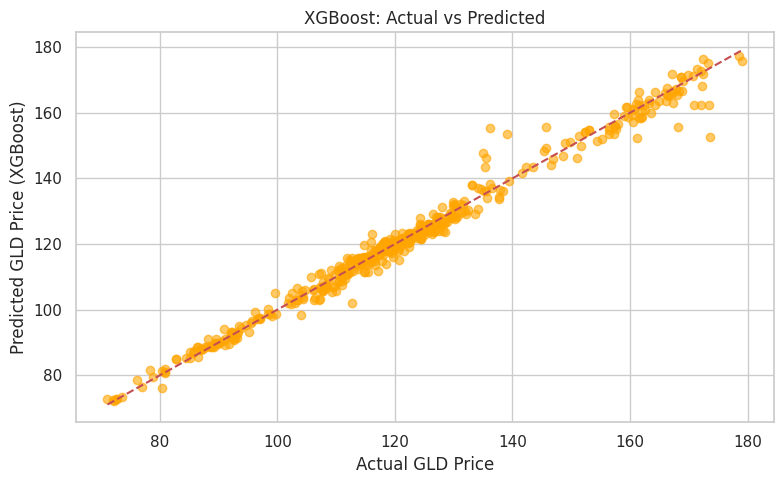

In [16]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_xgb, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual GLD Price")
plt.ylabel("Predicted GLD Price (XGBoost)")
plt.title("XGBoost: Actual vs Predicted")
plt.tight_layout()
plt.show()

# Random Forest (sklearn)

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

# Metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.4f}")

Random Forest MSE: 5.47
Random Forest R² Score: 0.9900


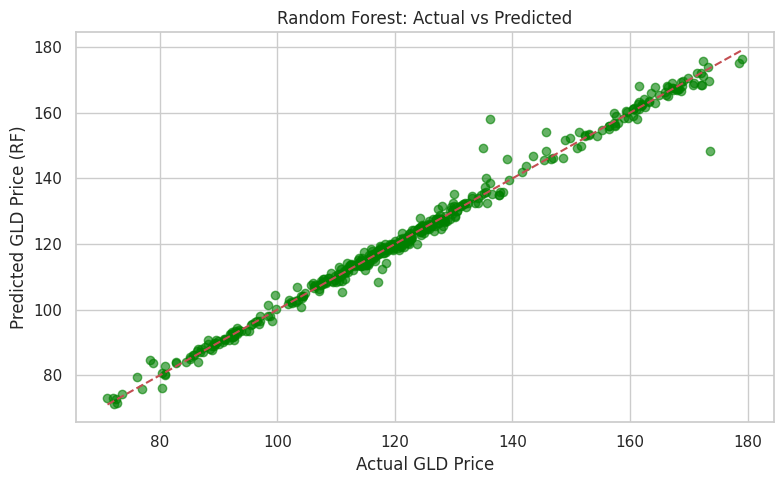

In [19]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual GLD Price")
plt.ylabel("Predicted GLD Price (RF)")
plt.title("Random Forest: Actual vs Predicted")
plt.tight_layout()
plt.show()

# Conclusion

| Model             | R² Score     |
| ----------------- | ------------ |
| Linear Regression | 0.8976       |
| Neural Network    | 0.9273       |
| XGBoost           | 0.9848       |
| **Random Forest** | **0.9900 ✅** |

Random Forest regressor have gor the highest R^2 score surpassing other models

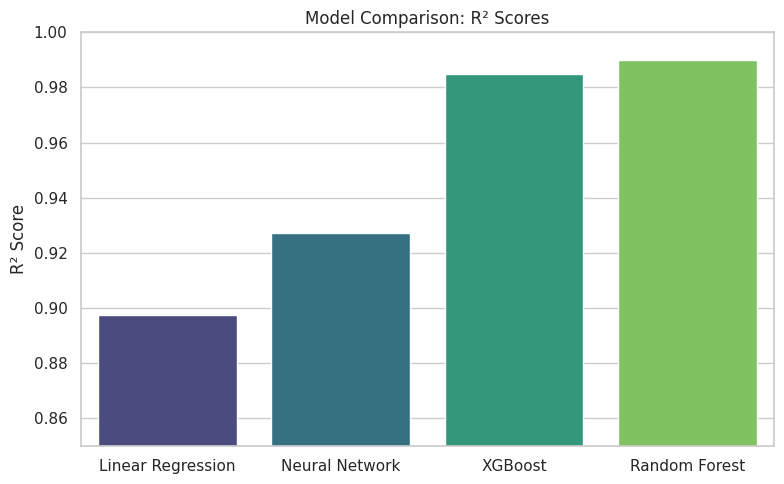

In [20]:
# R² scores
model_names = ['Linear Regression', 'Neural Network', 'XGBoost', 'Random Forest']
r2_scores = [0.8976, 0.9273, 0.9848, 0.9900]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=r2_scores, palette='viridis')
plt.ylim(0.85, 1.0)
plt.ylabel("R² Score")
plt.title("Model Comparison: R² Scores")
plt.tight_layout()
plt.show()